<a href="https://colab.research.google.com/github/rajput-t/ml_algorithms/blob/main/k_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors (k-NN)

The k-Nearest Neighbors (k-NN) algorithm is a simple, non-parametric algorithm used for both classification and regression tasks.

**How it works:**

*   **Classification:** To classify a new data point, k-NN looks at its `k` nearest neighbors in the training data based on a distance metric (commonly Euclidean distance). The new data point is assigned the class that is most common among its k neighbors.
*   **Regression:** For regression, k-NN predicts the value for a new data point by taking the average (or weighted average) of the values of its k nearest neighbors.

**Key Hyperparameter: k**

The value of `k` is crucial.
*   A small `k` makes the model sensitive to noise and outliers.
*   A large `k` smooths out the decision boundary but might miss local patterns.

Choosing the optimal `k` often involves experimentation, as demonstrated in the "Visualizing Accuracy vs. k" section.

## Subtask: Visualize the feature space
Visualize the decision boundary of the K-Nearest Neighbors algorithm on the Iris dataset using different values of K.

Select **two** features for visualization. This makes it easier to plot the decision boundary in **2D**.


In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from sklearn.datasets import load_iris
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Select the first two features
X_2d = X[:, :2]

**Train k-NN models** with **different values** of `k` for creating 2D visualisation.


In [3]:
k_values_viz = [1, 5, 10, 15]
trained_models = {}

for k in k_values_viz:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_2d, y)
    trained_models[k] = model

**Create a meshgrid** of points to cover the feature space.


In [4]:
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Reshape meshgrid points
mesh_points = np.c_[xx.ravel(), yy.ravel()]

Using the trained k-NN models to **predict the class for each point in the meshgrid**.


In [5]:
predicted_meshes = {}
for k, model in trained_models.items():
    predicted_meshes[k] = model.predict(mesh_points)

**Plotting the meshgrid** with predicted classes to visualize the decision boundary for each `k`.


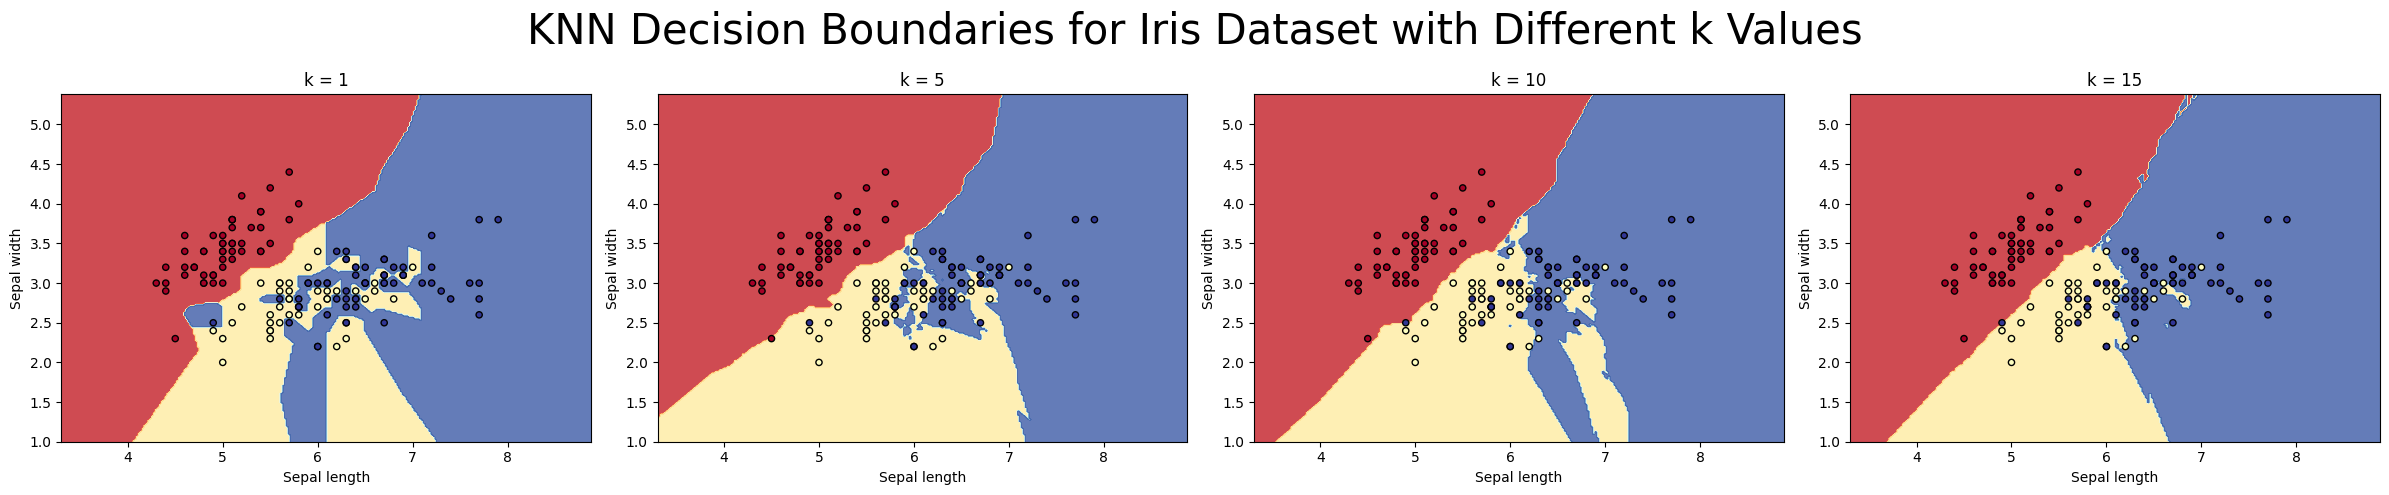

In [14]:
num_k_values = len(predicted_meshes)
fig, axes = plt.subplots(1, num_k_values, figsize=(6 * num_k_values, 5))

# Flatten axes array if there's only one subplot
if num_k_values == 1:
    axes = [axes]

for i, (k, predicted_mesh) in enumerate(predicted_meshes.items()):
    ax = axes[i]
    Z = predicted_mesh.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

fig.suptitle("KNN Decision Boundaries for Iris Dataset with Different k Values", fontsize=30)
plt.tight_layout()
plt.show()

## k-NN Classifier on Iris Dataset

**Code Explanation (k-NN Classifier):**

This cell demonstrates a k-NN classifier on the Iris dataset.

*   `KNeighborsClassifier(n_neighbors=5)`: This line initializes the k-NN classifier. The `n_neighbors` parameter is set to `5`, meaning the algorithm will consider the 5 nearest neighbors for classification.
*   `knn.fit(X_train, y_train)`: This trains the k-NN model using the training data. In k-NN, training simply involves storing the training data.
*   `knn.predict(y_test)`: This line makes predictions on the test data. For each data point in `X_test`, the model finds its 5 nearest neighbors in the training data (`X_train`) and predicts the class based on the majority class among those neighbors.

In [11]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Train k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



## Visualizing Accuracy vs. k

**Code Explanation (Visualizing Accuracy vs. k):**

This cell explores how the accuracy of the k-NN classifier changes with different values of `k`.

*   `k_values = list(range(1, 21))`: Creates a list of `k` values to test, from 1 to 20.
*   `for k in k_values:`: Loops through each `k` value.
*   `model = KNeighborsClassifier(n_neighbors=k)`: Initializes a new k-NN model for each `k`.
*   `model.fit(X_train, y_train)`: Trains the model with the current `k`.
*   `score = model.score(X_test, y_test)`: Calculates the accuracy of the model on the test data for the current `k`. The `score` method for classifiers returns the mean accuracy.
*   `accuracies.append(score)`: Stores the accuracy for the current `k`.
*   `plt.plot(k_values, accuracies, marker='o')`: Plots the calculated accuracies against their corresponding `k` values, showing how accuracy changes as `k` increases.

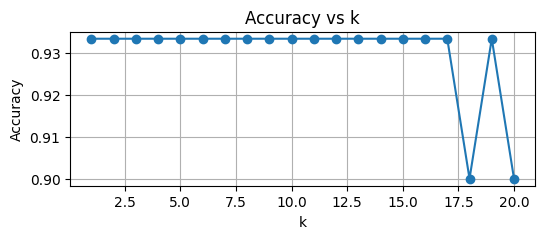

In [12]:
# Test accuracy for different k values
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracies.append(score)

# Plot
plt.figure(figsize=(6,2))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Insights

The visualizations clearly demonstrate how the complexity of the decision boundary changes with the value of `k`. Smaller `k` values result in more complex and potentially overfitting boundaries, while larger `k` values lead to smoother and more generalized boundaries.
